In [1]:
%config IPCompleter.evaluation='unsafe'

In [2]:
from pyiron_atomistics import Project
import numpy as np
import matplotlib.pyplot as plt
from atomrdf import KnowledgeGraph, System

In [3]:
project = 'wf_05'
pr = Project(project)
kg = KnowledgeGraph(store='db', store_file=f'{project}.db')
kg.enable_workflow(pr, workflow_environment='pyiron')

In [4]:
struct = pr.create.structure.annotated_structure.bulk('Cu')

In [5]:
refjob = pr.create.job.Lammps('reflmp')
refjob.structure = struct
refjob.potential = '2009--Mendelev-M-I--Cu-Zr--LAMMPS--ipr1'

In [6]:
phono = pr.create.job.PhonopyJob('phono')
phono.ref_job = refjob

In [7]:
quasi = pr.create.job.QuasiHarmonicJob('quasi')
quasi.ref_job = phono

In [8]:
quasi.input["temperature_end"] = 500
quasi.input["temperature_steps"] = 2
quasi.input["axes"]=["x","y","z"]
quasi.input["strains"] = None

In [9]:
quasi.run()

The job quasi was saved and received the ID: 452
The job quasi_0_9 was saved and received the ID: 453
The job reflmp_0 was saved and received the ID: 454
The job quasi_0_92 was saved and received the ID: 455
The job reflmp_0 was saved and received the ID: 456
The job quasi_0_94 was saved and received the ID: 457
The job reflmp_0 was saved and received the ID: 458
The job quasi_0_96 was saved and received the ID: 459
The job reflmp_0 was saved and received the ID: 460
The job quasi_0_98 was saved and received the ID: 461
The job reflmp_0 was saved and received the ID: 462
The job quasi_1_0 was saved and received the ID: 463
The job reflmp_0 was saved and received the ID: 464
The job quasi_1_02 was saved and received the ID: 465
The job reflmp_0 was saved and received the ID: 466
The job quasi_1_04 was saved and received the ID: 467
The job reflmp_0 was saved and received the ID: 468
The job quasi_1_06 was saved and received the ID: 469
The job reflmp_0 was saved and received the ID: 470

In [10]:
kg.add_workflow(quasi, workflow_environment='pyiron')

/home/srmnitc/miniconda3/envs/workflow-rdf/lib/python3.11/site-packages/atomrdf/graph.py:376: UserWarning: asmo:hasValue has a range with unspecified datatype!
  warnings.warn(f"{triple[1].name} has a range with unspecified datatype!")


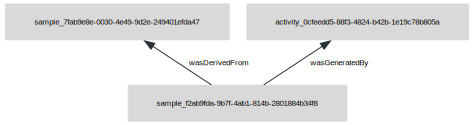

In [11]:
kg.visualise(sample_view=True, layout='dot')

In [13]:
kg.samples

[sample:7fab9e8e-0030-4e49-9d2e-249401efda47,
 sample:f2ab9fda-9b7f-4ab1-814b-2801884b34f8_from_sample:7fab9e8e-0030-4e49-9d2e-249401efda47]

In [14]:
sample = kg.samples[-1]

In [15]:
sample.outputs.QuasiHarmonicTemperature

[  0. 500.] K

Text(0, 0.5, 'Free Energy')

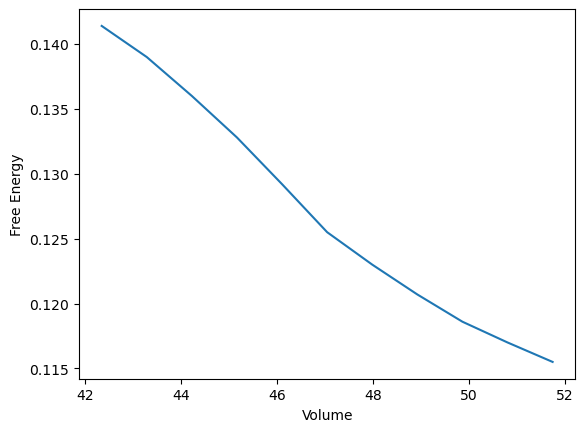

In [19]:
plt.plot(sample.outputs.QuasiHarmonicVolume.value[0], sample.outputs.QuasiHarmonicFreeEnergy.value[0])
plt.xlabel('Volume')
plt.ylabel('Free Energy')